In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
X = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

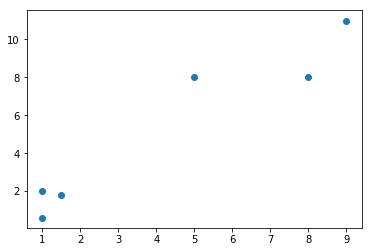

In [48]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [49]:
from sklearn.cluster import KMeans

In [50]:
k_means = KMeans(n_clusters = 3)

In [51]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
k_means.labels_

array([0, 0, 1, 1, 0, 2])

In [53]:
k_means.cluster_centers_

array([[ 1.16666667,  1.46666667],
       [ 6.5       ,  8.        ],
       [ 9.        , 11.        ]])

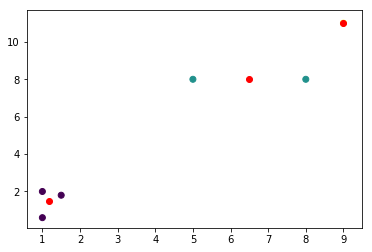

In [54]:
plt.scatter(X[:,0], X[:,1], c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],c="red")
plt.show()

In [76]:
def fit(data,k=2,max_iter=100):
    
    means=[]
   
    for i in range(k):
        means.append(data[i])
    for i in range(max_iter):
        #assign the points to the nearest cluster
        clusters=[]
        for j in range(k):
            clusters.append([])
        for point in data:
            #find distance to all the mean values
            distances=[((point-n)**2).sum() for n in means]
            #find the min distance
            minDistance=min(distances)
            #find the mean l which gave the min distance
            l=distances.index(minDistance)
            #assign this point to the cluster l
            clusters[l].append(point)
        
        #calculate the new means
        change=False
        for j in range(k):
            new_mean=np.average(clusters[j],axis=0)
            if not np.array_equal(new_mean,means[j]):
                change=True
                means[j]=new_mean
        if change==False:
            break
    return means

In [77]:
means=fit(X)

In [78]:
def predict(test_data,means):
    predictions=[]
    for point in test_data:
        #find distance to all the mean values
        distances=[((point-n)**2).sum() for n in means]
        #find the min distance
        minDistance=min(distances)
        #find the mean l which gave the min distance
        l=distances.index(minDistance)
        predictions.append(l)
    return predictions

In [79]:
predict(X,means)

[0, 0, 1, 1, 0, 1]